# **Importing all necessary libraries**

In [ ]:
import warnings
warnings.simplefilter('ignore')
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os

# **Saving dataset and labels into arrays**

**As a dataset was chosen the one with brain tumor MRI-images: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/**

In [ ]:
img_size=128
X=np.zeros(shape=(7023,img_size,img_size,3),dtype='uint8')
y=[]
i=0
for img in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/'):
    image=cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/'+img)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(img_size,img_size))
    X[i]=image
    y.append(0)
    i+=1
for img in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/notumor/'):
    image=cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/notumor/'+img)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(img_size,img_size))
    X[i]=image
    y.append(0)
    i+=1
for img in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/'):
    image=cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/'+img)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(img_size,img_size))
    X[i]=image
    y.append(1)
    i+=1
for img in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/'):
    image=cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/'+img)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(img_size,img_size))
    X[i]=image
    y.append(1)
    i+=1
for img in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/'):
    image=cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/'+img)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(img_size,img_size))
    X[i]=image
    y.append(2)
    i+=1
for img in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/'):
    image=cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/'+img,0)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(img_size,img_size))
    X[i]=image
    y.append(2)
    i+=1
for img in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/'):
    image=cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/'+img,0)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(img_size,img_size))
    X[i]=image
    y.append(3)
    i+=1
for img in os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training/glioma/'):
    image=cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/glioma/'+img,0)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(img_size,img_size))
    X[i]=image
    y.append(3)
    i+=1
y=np.array(y)
print(X.shape)
print(y.shape)

(7023, 128, 128, 3)
(7023,)


# **Visualizing images from dataset**

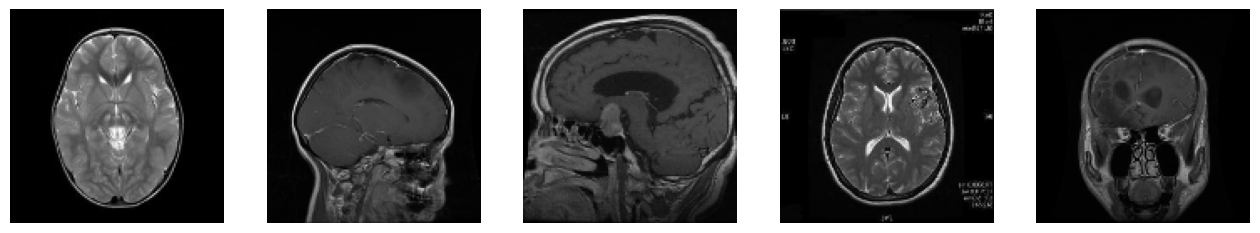

In [ ]:
fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(1,5,1)
ax.axis('off')
ax.imshow(X[0])
ax=fig.add_subplot(1,5,2)
ax.axis('off')
ax.imshow(X[-1])
ax=fig.add_subplot(1,5,3)
ax.axis('off')
ax.imshow(X[3001])
ax=fig.add_subplot(1,5,4)
ax.axis('off')
ax.imshow(X[2])
ax=fig.add_subplot(1,5,5)
ax.axis('off')
ax.imshow(X[-2])
plt.show()

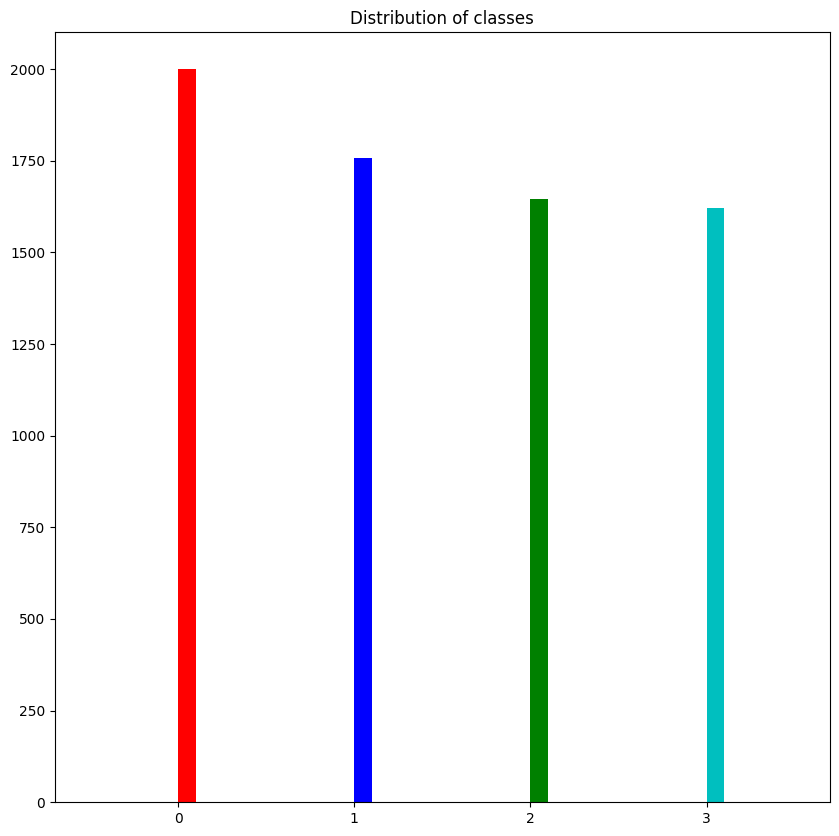

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Distribution of classes')
ax.hist(y[y==0],color='r')
ax.hist(y[y==1],color='b')
ax.hist(y[y==2],color='g')
ax.hist(y[y==3],color='c')
plt.xticks([0,1,2,3])
plt.show()

# **Splitting datset on train,test and validation sample**

In [ ]:
X,y=shuffle(X,y,random_state=1)
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.9,random_state=1)
X_train=np.concatenate([X_train,np.array([cv2.flip(image,1) for image in X_train])],axis=0)
y_train=np.concatenate([y_train,y_train],axis=0)
X_val,X_test,y_val,y_test=train_test_split(X_val,y_val,test_size=0.5,random_state=1)
BATCH_SIZE=256
X_train=tf.convert_to_tensor(X_train)
print(X_train.shape)
y_train=tf.convert_to_tensor(y_train)
print(y_train.shape)
X_val=tf.convert_to_tensor(X_val)
print(X_val.shape)
y_val=tf.convert_to_tensor(y_val)
print(y_val.shape)
X_test=tf.convert_to_tensor(X_test)
print(X_test.shape)
y_test=tf.convert_to_tensor(y_test)
print(y_test.shape)
train_data=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(BATCH_SIZE)
val_data=tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(BATCH_SIZE)
test_data=tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(BATCH_SIZE)

(12640, 128, 128, 3)
(12640,)
(351, 128, 128, 3)
(351,)
(352, 128, 128, 3)
(352,)


# **Defining base model**

In [ ]:
base_model=tf.keras.applications.vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for l in base_model.layers:
    l.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


# **No special blocks**

In [ ]:
no_updates=tf.keras.Sequential([base_model,
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units=128,activation='leaky_relu'),
                                tf.keras.layers.Dense(units=4,activation='Softmax')])
no_updates.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-4),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['Accuracy'])
no_updates.summary()
hist=no_updates.fit(train_data,epochs=10,validation_data=val_data)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 15,763,908
Trainable params: 1,049,220
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/10
50/50 [==============================] - 23s 242ms/step - loss: 10.4693 - Accuracy: 0.5747 - val_loss: 6.0627 - val_Accuracy: 0.7037
Epoch 2/10
50/50 [======

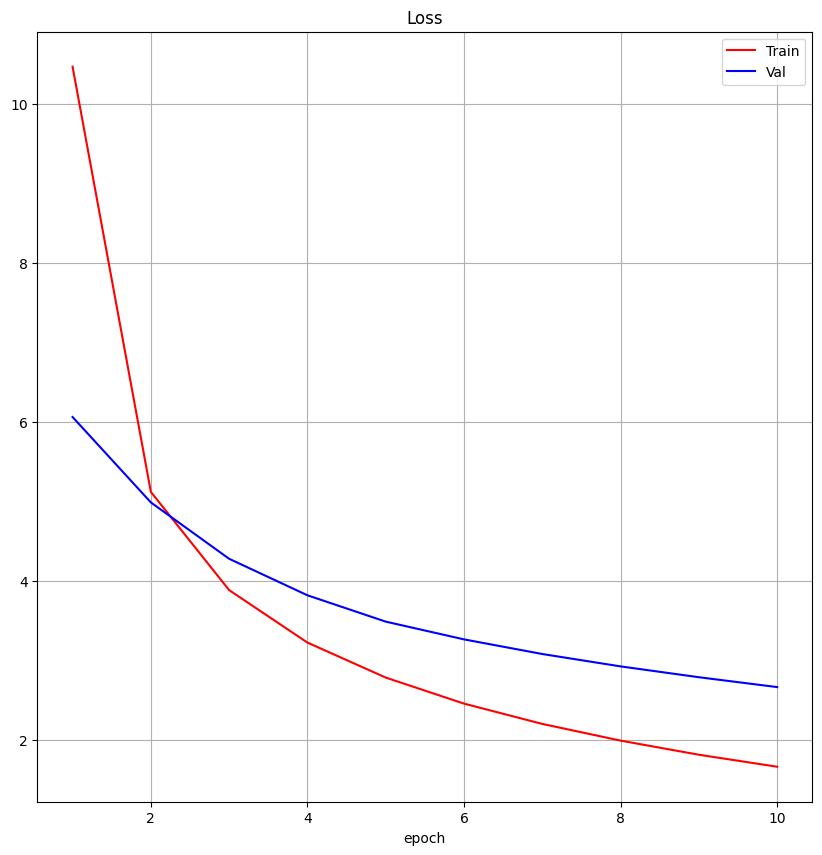

In [ ]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
ep=[i for i in range(1,11)]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss')
ax.set_xlabel('epoch')
ax.plot(ep,train_loss,color='r',label='Train')
ax.plot(ep,val_loss,color='b',label='Val')
ax.legend()
ax.grid()
plt.show()

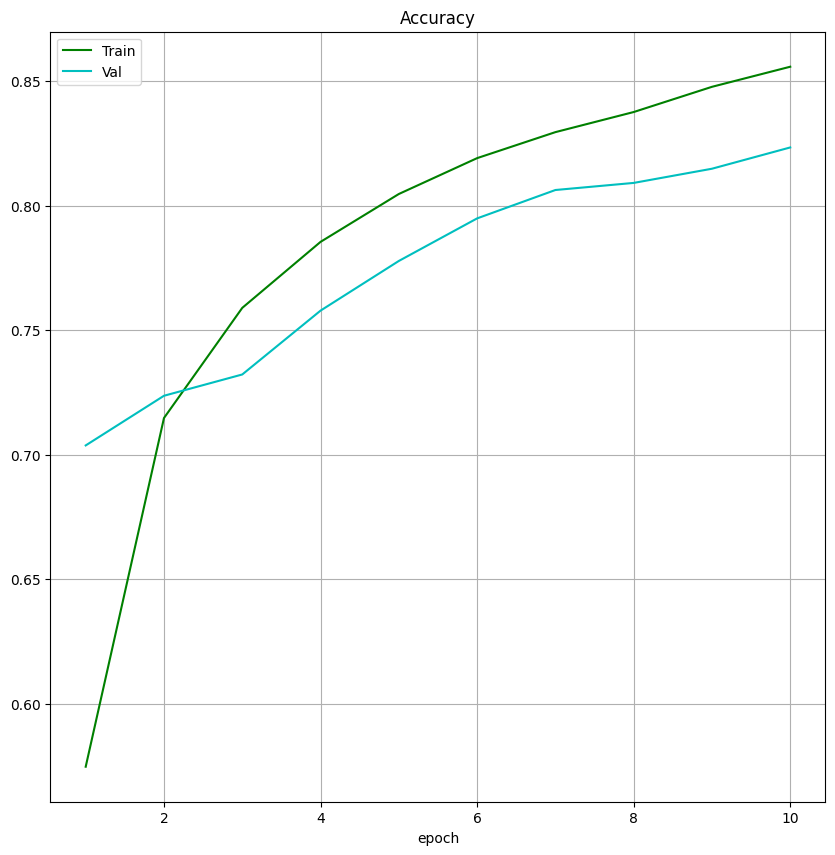

In [ ]:
train_acc=hist.history['Accuracy']
val_acc=hist.history['val_Accuracy']
ep=[i for i in range(1,11)]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Accuracy')
ax.set_xlabel('epoch')
ax.plot(ep,train_acc,color='g',label='Train')
ax.plot(ep,val_acc,color='c',label='Val')
ax.legend()
ax.grid()
plt.show()

In [ ]:
no_updates.evaluate(test_data)

2/2 [==============================] - 0s 63ms/step - loss: 3.3103 - Accuracy: 0.7955


[3.31034779548645, 0.7954545617103577]

# **Squeeze-Excitation Block**

<img src='https://www.researchgate.net/publication/331195671/figure/fig2/AS:727865238757378@1550548004420/Squeeze-and-Excitation-block-adapted-from-2.ppm' width=480 height=640>

In [ ]:
def Squeeze_Excitation_Block(In,r=8):
    shape=In.shape[1:]
    x=tf.keras.layers.GlobalAveragePooling2D()(In)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(units=shape[2]//r,activation='relu')(x)
    x=tf.keras.layers.Dense(units=shape[2],activation='sigmoid')(x)
    x=tf.keras.layers.Reshape(target_shape=(1,1,shape[2]))(x)
    output=In*x
    return output

In [ ]:
def model_with_seb():
    In=tf.keras.Input(shape=(img_size,img_size,3))
    x=base_model.layers[1](In)
    for l in base_model.layers[2:]:
        x=l(x)
    x=Squeeze_Excitation_Block(x)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(units=128,activation='leaky_relu')(x)
    Out=tf.keras.layers.Dense(units=4,activation='Softmax')(x)
    model=tf.keras.Model(inputs=In,outputs=Out)
    return model

In [ ]:
model_with_seb=model_with_seb()
model_with_seb.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-4),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['Accuracy'])
model_with_seb.summary()
hist=model_with_seb.fit(train_data,epochs=10,validation_data=val_data)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[1][0]']           
                                )                                                             

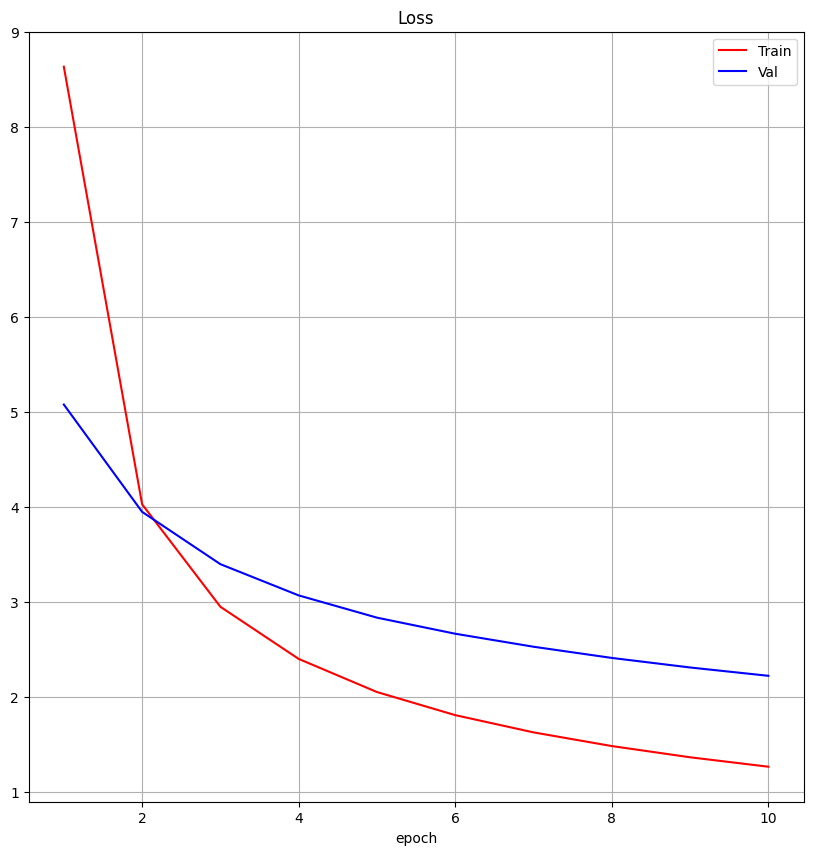

In [ ]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
ep=[i for i in range(1,11)]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss')
ax.set_xlabel('epoch')
ax.plot(ep,train_loss,color='r',label='Train')
ax.plot(ep,val_loss,color='b',label='Val')
ax.legend()
ax.grid()
plt.show()

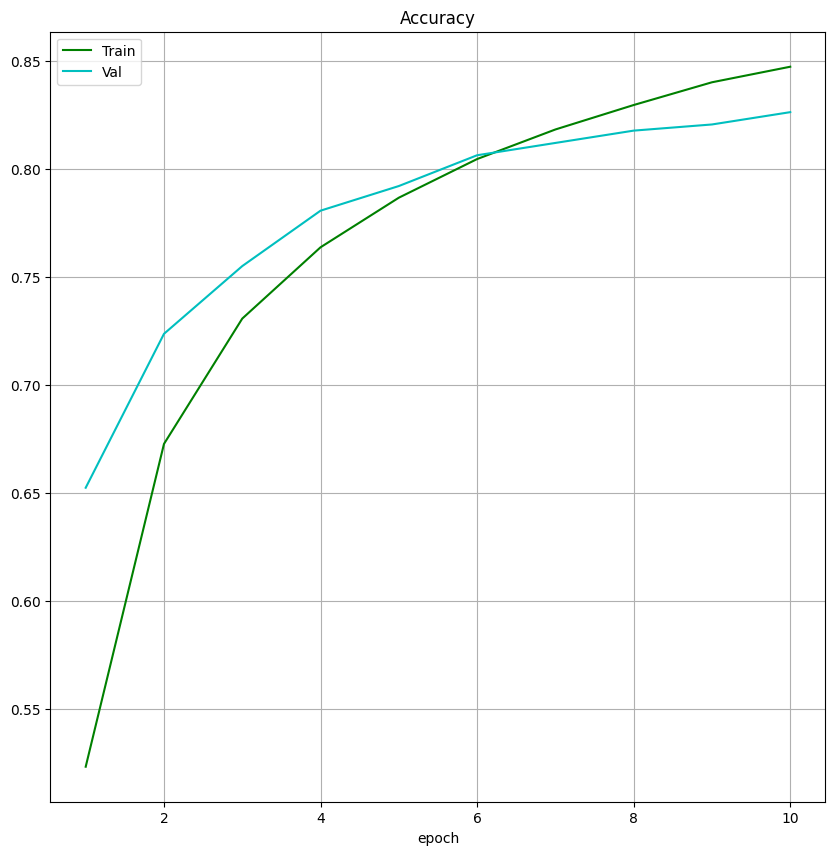

In [ ]:
train_acc=hist.history['Accuracy']
val_acc=hist.history['val_Accuracy']
ep=[i for i in range(1,11)]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Accuracy')
ax.set_xlabel('epoch')
ax.plot(ep,train_acc,color='g',label='Train')
ax.plot(ep,val_acc,color='c',label='Val')
ax.legend()
ax.grid()
plt.show()

In [ ]:
model_with_seb.evaluate(test_data)

2/2 [==============================] - 0s 63ms/step - loss: 1.9553 - Accuracy: 0.8352


[1.9552581310272217, 0.8352272510528564]

# **Inception Module**

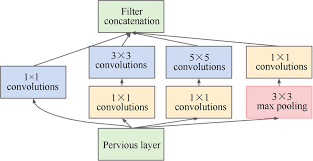

In [ ]:
def Inception_Module(In,filters_numb,dim_red=False):
    shape=In.shape[1:]
    x1=tf.keras.layers.Conv2D(filters=filters_numb[0],kernel_size=(1,1),padding='same',strides=(1,1))(In)
    x2=tf.keras.layers.Conv2D(filters=filters_numb[1],kernel_size=(1,1),padding='same',strides=(1,1))(In)
    x2=tf.keras.layers.Conv2D(filters=filters_numb[1],kernel_size=(3,3),padding='same',strides=(1,1))(x2)
    x3=tf.keras.layers.Conv2D(filters=filters_numb[2],kernel_size=(1,1),padding='same',strides=(1,1))(In)
    x3=tf.keras.layers.Conv2D(filters=filters_numb[2],kernel_size=(5,5),padding='same',strides=(1,1))(x3)
    x4=tf.keras.layers.MaxPooling2D(pool_size=(3,3),padding='same',strides=(1,1))(In)
    x4=tf.keras.layers.Conv2D(filters=shape[2]//2,kernel_size=(1,1),padding='same',strides=(1,1))(x4)
    Out=tf.keras.layers.Concatenate(axis=-1)([x1,x2,x3,x4])
    return Out

In [ ]:
def model_with_im(filters_numb,dim_red=False):
    In=tf.keras.Input(shape=(img_size,img_size,3))
    x=base_model.layers[1](In)
    for l in base_model.layers[2:]:
        x=l(x)
    x=Inception_Module(x,filters_numb,dim_red)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(units=128,activation='leaky_relu')(x)
    Out=tf.keras.layers.Dense(units=4,activation='Softmax')(x)
    model=tf.keras.Model(inputs=In,outputs=Out)
    return model

In [ ]:
model_with_im=model_with_im(dim_red=True,filters_numb=[64,64,128])
model_with_im.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-4),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['Accuracy'])
model_with_im.summary()
hist=model_with_im.fit(train_data,epochs=10,validation_data=val_data)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[2][0]']           
                                )                                                           

In [ ]:
model_with_im.evaluate(test_data)

2/2 [==============================] - 0s 63ms/step - loss: 2.8628 - Accuracy: 0.8636


[2.8628485202789307, 0.8636363744735718]

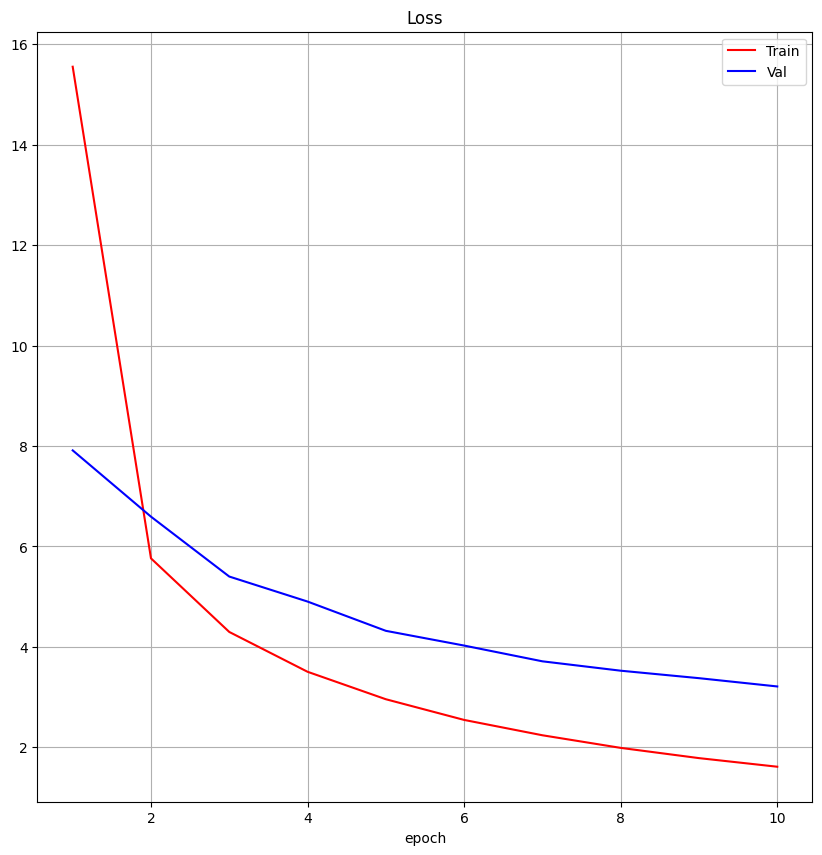

In [ ]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
ep=[i for i in range(1,11)]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss')
ax.set_xlabel('epoch')
ax.plot(ep,train_loss,color='r',label='Train')
ax.plot(ep,val_loss,color='b',label='Val')
ax.legend()
ax.grid()
plt.show()

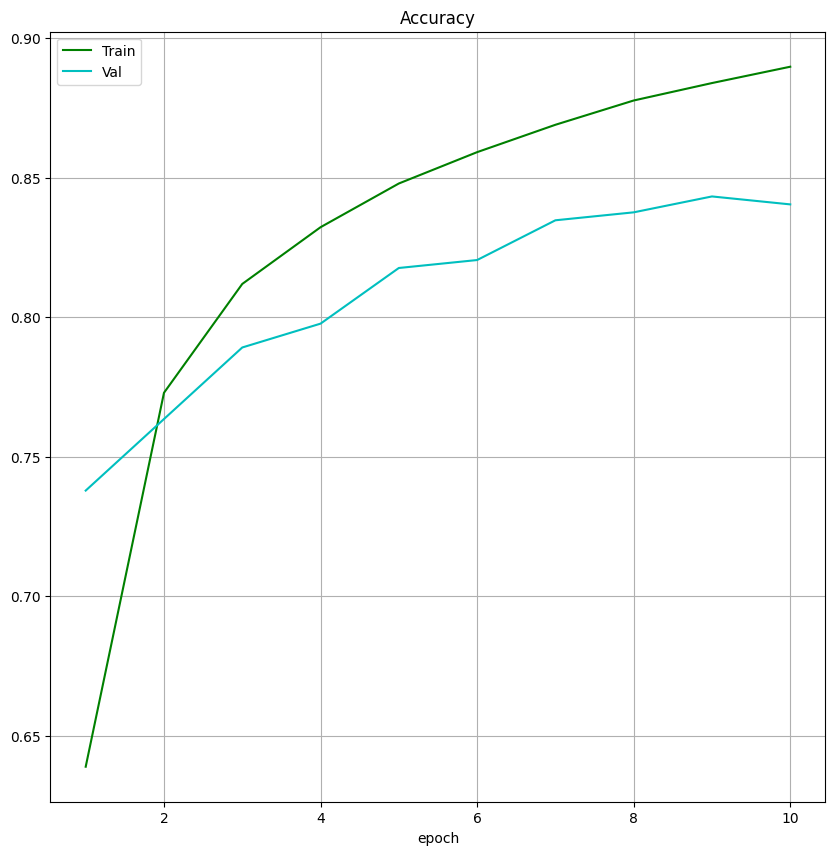

In [ ]:
train_acc=hist.history['Accuracy']
val_acc=hist.history['val_Accuracy']
ep=[i for i in range(1,11)]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Accuracy')
ax.set_xlabel('epoch')
ax.plot(ep,train_acc,color='g',label='Train')
ax.plot(ep,val_acc,color='c',label='Val')
ax.legend()
ax.grid()
plt.show()

# **Basic Attention Module**

<img src='https://miro.medium.com/v2/resize:fit:1400/1*tz-4NimbF5Rex2pngzLuFw.jpeg' width=640, height=480>

In [ ]:
def Attention_Module(In,r=32):
    shape=In.shape[1:]
    x1=tf.keras.layers.Conv2D(filters=shape[2],kernel_size=(2,2),strides=(1,1),padding='same',activation='leaky_relu')(In)
    x2=tf.keras.layers.Flatten()(x1)
    x3=tf.keras.layers.Dense(units=x2.shape[-1]//r,activation='leaky_relu')(x2)
    x4=tf.keras.layers.Dense(units=shape[0]*shape[1],activation='sigmoid')(x3)
    x5=tf.keras.layers.Reshape(target_shape=(shape[0],shape[1],1))(x4)
    Out=In*x5
    return Out

In [ ]:
def model_with_am():
    In=tf.keras.Input(shape=(img_size,img_size,3))
    x=base_model.layers[1](In)
    for l in base_model.layers[2:]:
        x=l(x)
    x=Attention_Module(x)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(units=128,activation='leaky_relu')(x)
    Out=tf.keras.layers.Dense(units=4,activation='Softmax')(x)
    model=tf.keras.Model(inputs=In,outputs=Out)
    return model

In [ ]:
model_with_am=model_with_am()
model_with_am.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-4),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['Accuracy'])
model_with_am.summary()
hist=model_with_am.fit(train_data,epochs=10,validation_data=val_data)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[3][0]']           
                                )                                                           

In [ ]:
model_with_am.evaluate(test_data)

2/2 [==============================] - 0s 63ms/step - loss: 1.5447 - Accuracy: 0.7983


[1.5447460412979126, 0.7982954382896423]

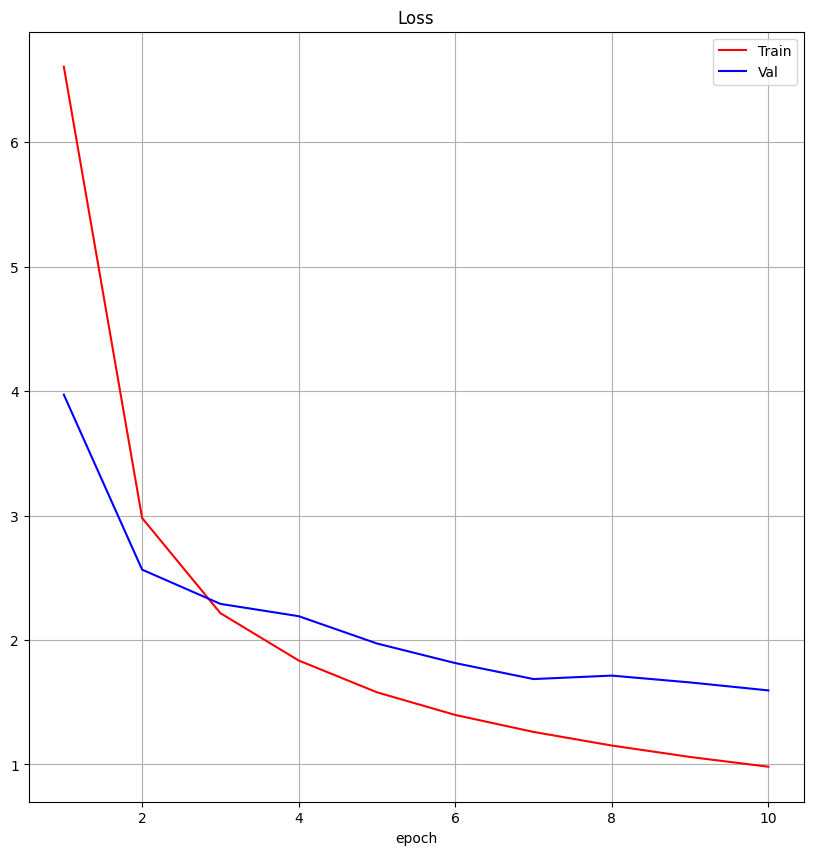

In [ ]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
ep=[i for i in range(1,11)]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss')
ax.set_xlabel('epoch')
ax.plot(ep,train_loss,color='r',label='Train')
ax.plot(ep,val_loss,color='b',label='Val')
ax.legend()
ax.grid()
plt.show()

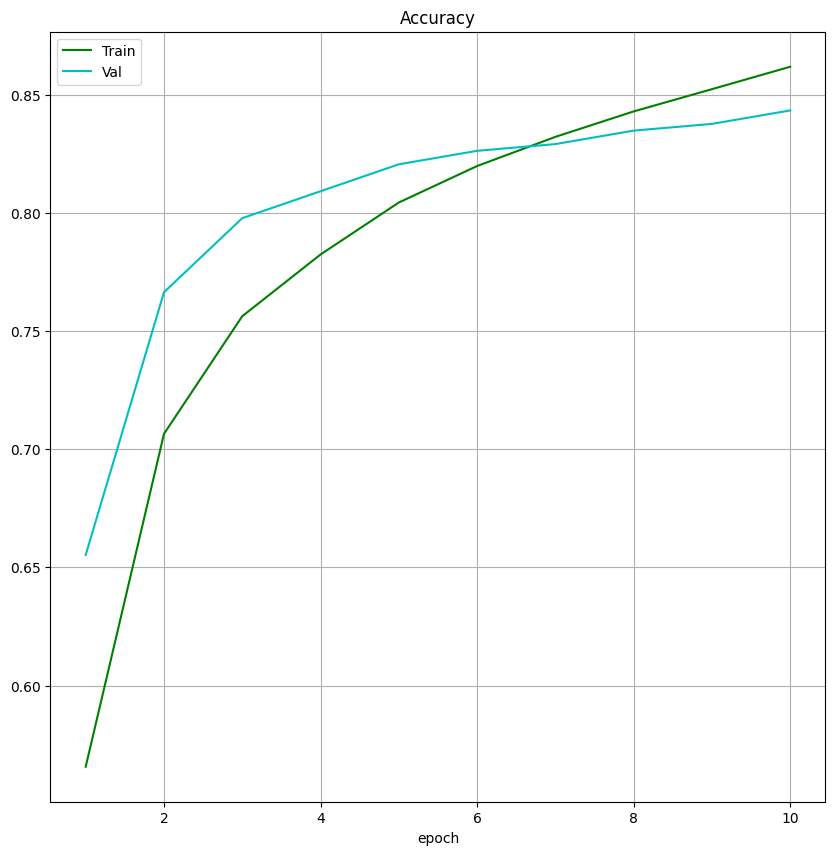

In [ ]:
train_acc=hist.history['Accuracy']
val_acc=hist.history['val_Accuracy']
ep=[i for i in range(1,11)]
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_title('Accuracy')
ax.set_xlabel('epoch')
ax.plot(ep,train_acc,color='g',label='Train')
ax.plot(ep,val_acc,color='c',label='Val')
ax.legend()
ax.grid()
plt.show()